# 05과 실전 단변량분석 : 종합실습

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings   
warnings.filterwarnings("ignore")  # 향후 버전에서 제외될 수 있다는 경고 메시지 감추기

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [12]:
var = 'Sales'
data[var]

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

1) 변수의 비즈니스 의미

In [15]:
각 지역 판매량(단위 : 1000개)

2) 숫자, 범주?

In [16]:
숫자

3) NaN 존재 유무 및 조치방안

In [17]:
data[var].isnull().sum()

0

In [ ]:
NaN 값 없음

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [18]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

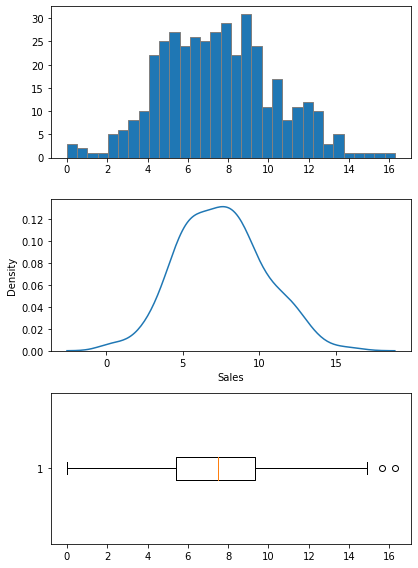

In [36]:
plt.figure(figsize=(6,8))

plt.subplot(3,1,1)
plt.hist(data[var], bins=32, edgecolor='gray')


plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
plt.boxplot(data[var], vert=False)


plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
판매량은 정규 분포의 형태로 나옴

8) 추가 분석해 볼 사항이 있나요?

### ② CompPrice

In [38]:
var = 'CompPrice'
data[var]

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

1) 변수의 비즈니스 의미

In [ ]:
경쟁사 가격(단위 : 달러)

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [40]:
data[var].isnull().sum()

0

In [ ]:
NaN 존재 x

4) 가변수화 필요 여부

In [ ]:
x

5) 기초통계량(수치화)

In [41]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

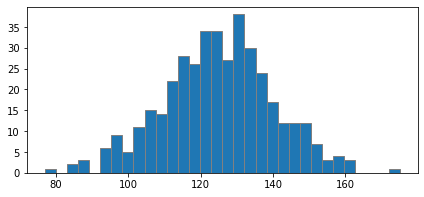

In [48]:
plt.figure(figsize = (6, 8))

plt.subplot(3,1,1)
plt.hist(data[var], bins=32, edgecolor='gray')


plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [55]:
print(data[var].describe())
print(data['Price'].describe())

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64
count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64


In [ ]:
우리 지점에서 판매한 평균 가격이 더 적다.
표준 편차가 큰것으로 보아 지점별 가격편차가 커서 판매량에 영향을 줄 수 있을것 같다.

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
비슷한 카시트 제품군으로 비교해보아야 될것 같다.

### ③ Income

In [82]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [83]:
data[var].isna().sum()

0

* NAN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [84]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

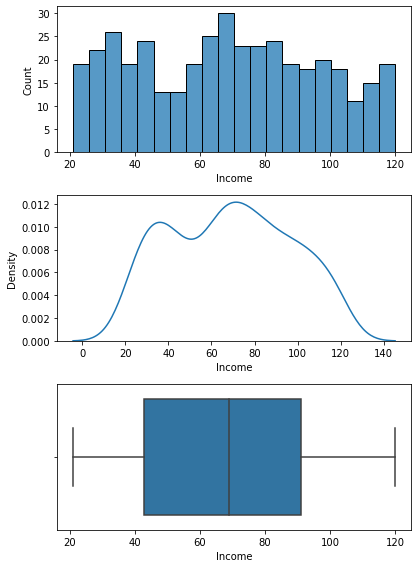

In [85]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전 연령에 대한 인구별 평균 소득액? 성인에 대한 평균 소득액?
* 2만달러 ~ 12만 달러 이므로 연간 소득일 것.
* 50%가 약 4만달러 ~ 9만달러

8) 추가 분석해 볼 사항이 있나요?

* 평균 소득과 카시트 판매량과의 관계
* 평균 소득과 카시트 가격과의 관계

### ④ Advertising

In [87]:
var = 'Advertising'
data[var]

0      11
1      16
2      10
3       4
4       3
       ..
395    17
396     3
397    12
398     7
399     0
Name: Advertising, Length: 400, dtype: int64

1) 변수의 비즈니스 의미

In [77]:
각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [57]:
data[var].isnull().sum()

0

In [ ]:
NaN 없음

4) 가변수화 필요 여부

In [ ]:
x

5) 기초통계량(수치화)

In [78]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

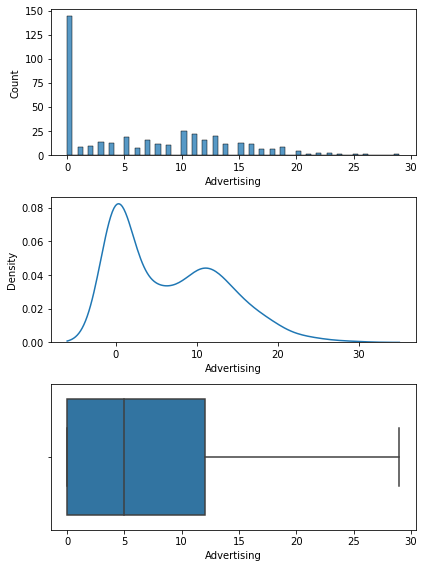

In [89]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

In [ ]:
그룹으로 나눠있을때는 boxplot에서 이상치가 안나올경우가 있다.
그룹별로 나누어서 다시 분석

In [146]:
type(data[var])

pandas.core.series.Series

In [158]:
data.loc[data[var] > 0, [var]]
temp = data.loc[data[var] > 0, var]
temp

0      120
1       83
2       80
3       97
4      128
      ... 
395    128
396    120
397    159
398     95
399    120
Name: Price, Length: 400, dtype: int64

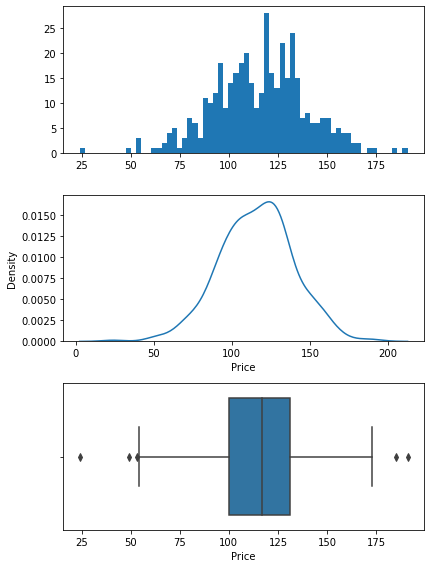

In [159]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.hist(temp , bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(temp)

plt.subplot(3,1,3)
sns.boxplot(temp)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
광고 예산이 없는 경우가 많다.
광고예산이 있는 지역도 있는데 이 지역들의 판매량과 광고예산이 적은지역이 판매량을 비교해봐야겠다. 

8) 추가 분석해 볼 사항이 있나요?

### ⑤ Population

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

In [114]:
var = 'Price'
data[var]

0      120
1       83
2       80
3       97
4      128
      ... 
395    128
396    120
397    159
398     95
399    120
Name: Price, Length: 400, dtype: int64

1) 변수의 비즈니스 의미

In [ ]:
자사 지역별 판매가격

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [109]:
data[var].isnull().sum()

0

In [ ]:
x

4) 가변수화 필요 여부

In [111]:
x

5) 기초통계량(수치화)

In [115]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

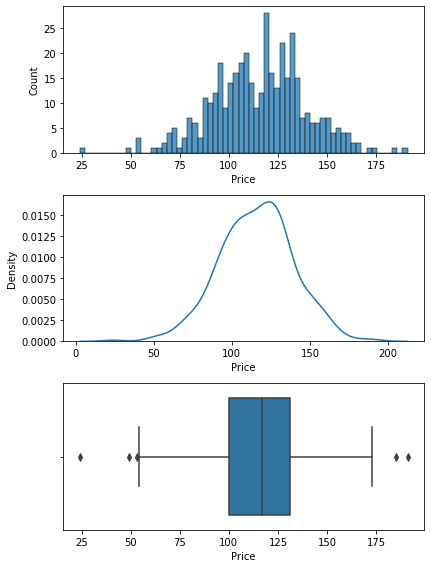

In [116]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

In [64]:
var = 'ShelveLoc'
print(data[var])

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

1) 변수의 비즈니스 의미

In [66]:
진열상태 / Bad, Good, Medium 값을 갖는다.

In [67]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [69]:
data[var].isnull().sum()

0

In [ ]:
NaN 존재 x 

4) 가변수화 필요 여부

In [ ]:
가변수화 필요 o

5) 기초통계량(수치화)

In [70]:
data[var].describe()

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

6) 분포 확인(시각화)

In [72]:
temp = data[var].value_counts()
temp

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

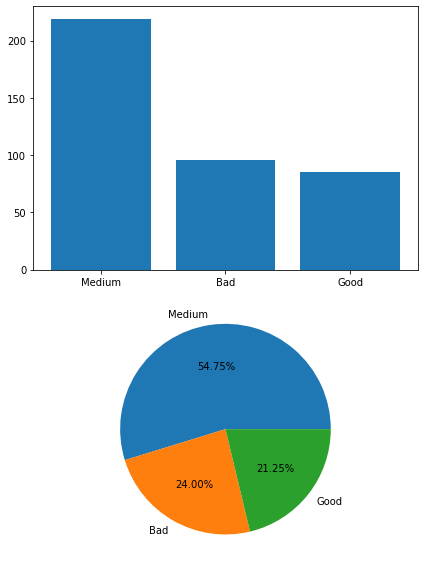

In [94]:
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
bad - medium, medium - good 각각의 차이 구하기
진열상태에 따라 판매량 차이가 있을까?
각각의 진열상태를 만드는데 사용되는 비용

8) 추가 분석해 볼 사항이 있나요?

0      11
1      16
2      10
3       4
4       3
       ..
395    17
396     3
397    12
398     7
399     0
Name: Advertising, Length: 400, dtype: int64

### ⑧ Age

In [105]:
var = 'Age'
data[var]

0      42
1      65
2      59
3      55
4      38
       ..
395    33
396    55
397    40
398    50
399    49
Name: Age, Length: 400, dtype: int64

1) 변수의 비즈니스 의미

In [ ]:
지역 인구의 평균 연령

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [108]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
x

5) 기초통계량(수치화)

In [107]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

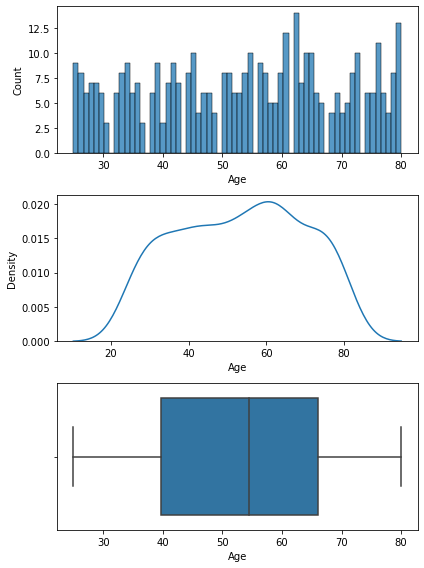

In [106]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 64)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [95]:
var = "Urban"
data[var]

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
395    Yes
396     No
397    Yes
398    Yes
399    Yes
Name: Urban, Length: 400, dtype: object

1) 변수의 비즈니스 의미

In [ ]:
도심 지역 여부(Yes,No)

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [97]:
data[var].isnull().sum()

0

In [ ]:
x

4) 가변수화 필요 여부

In [ ]:
가변수화 필요 o

5) 기초통계량(수치화)

In [98]:
data[var].describe()

count     400
unique      2
top       Yes
freq      282
Name: Urban, dtype: object

6) 분포 확인(시각화)

In [101]:
temp = data[var].value_counts()

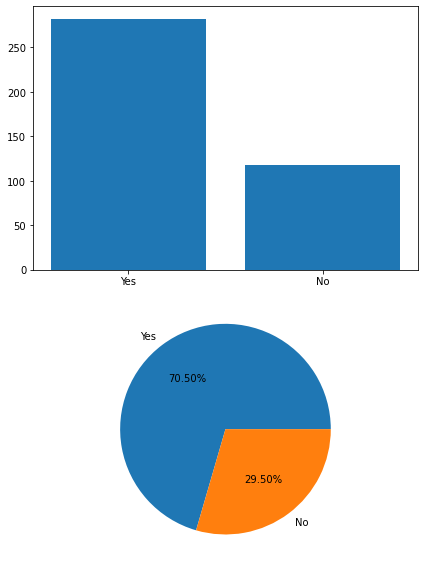

In [102]:
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
도심 지역과 이외 지역의 판매량 차이가 있을까?

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?